In [1]:
from power import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

## Flow DC VS AC

Converged in 3 iterations.


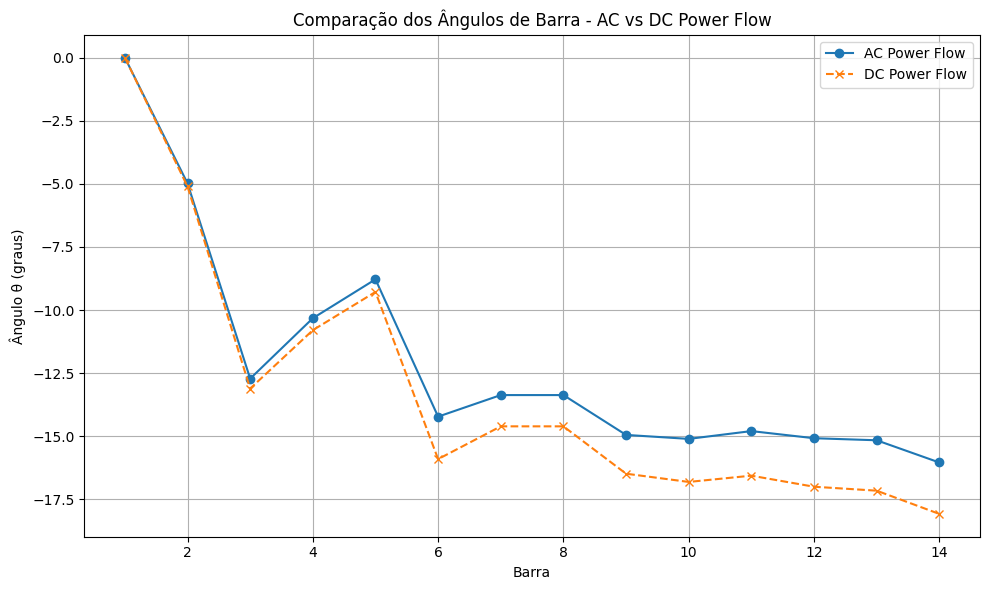

In [2]:
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net = builder.build_network()
solver = AC_PF(net)
solver.solve(verbose=False)
V = solver.V
theta_ac = solver.theta

solver_DC = DC_PF(net)
theta_dc = solver_DC.solve()


# Índice das barras (1, 2, 3, ...)
barras = np.arange(1, len(theta_ac) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(barras, theta_ac, marker='o', label='AC Power Flow')
plt.plot(barras, theta_dc, marker='x', linestyle='--', label='DC Power Flow')
plt.xlabel('Barra')
plt.ylabel('Ângulo θ (graus)')
plt.title('Comparação dos Ângulos de Barra - AC vs DC Power Flow')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Comparação


In [20]:
#Fluxos AC
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net_AC = builder.build_network()
solver_AC = AC_PF(net_AC)
solver_AC.solve(verbose=False)
flow_AC = solver_AC.get_line_flows()
print(flow_AC)

Converged in 3 iterations.
[ 1.52538446  0.72788852  0.70867927  0.54461093  0.40609939 -0.23703421
 -0.61735692  0.0728649   0.07710229  0.1752845   0.          0.28086977
  0.05225817  0.09321136 -0.03786492  0.0160399   0.05578864  0.28086975
  0.16089865  0.44063101]


In [21]:
#Fluxos DC
caminho = 'pwf_systems/IEEE14.pwf'
builder = PWF_Network_Builder(caminho)
net_DC = builder.build_network()
solver_DC = DC_PF(net_DC)
solver_DC.solve()
flow_DC= solver_DC.get_line_flows()
print(flow_DC)

[ 1.50572852  0.7263703   0.70587544  0.56350827  0.41934481 -0.23612456
 -0.6279293   0.05757286  0.07464735  0.16752416  0.          0.29767234
  0.06742714  0.10282849 -0.02257286  0.01364735  0.04617151  0.31794396
  0.17842313  0.45864718]


In [22]:
P = [net_DC.buses[i].p for i in range(len(net_DC.buses))]
# CTDF Ground
T = net_DC.CTDF()

# Calculando os fluxos de linha usando a matriz CTDF
flow_CTDF_grnd = np.dot(T, P)
print("Fluxos de linha usando CTDF:")
print(flow_CTDF_grnd)


Fluxos de linha usando CTDF:
[ 2.94587717e+00+0.j -2.94587717e+00+0.j  2.85303312e+00+0.j
  5.05704945e+00+0.j -4.78120540e+00+0.j  1.91103312e+00+0.j
 -4.09170020e+01+0.j -2.75334736e+01+0.j -3.97774135e+00+0.j
 -1.40079039e+01+0.j -1.38760546e-13+0.j  3.76697206e+01+0.j
  2.76584736e+01+0.j  1.83306452e+01+0.j  2.75684736e+01+0.j
 -4.03874135e+00+0.j -1.81816452e+01+0.j  1.19567026e+02+0.j
  5.24073186e+01+0.j  1.74508147e+02+0.j]


In [15]:
# CTDF Slack
T = net_DC.CTDF(ref_bus=net_DC.buses[0])
# Calculando os fluxos de linha usando a matriz CTDF
flow_CTDF_slack = np.dot(T, P)
print("Fluxos de linha usando CTDF:")
print(flow_CTDF_slack)

Fluxos de linha usando CTDF:
[ 1.53289065e+00+0.j  6.57109347e-01+0.j  7.46372220e-01+0.j
  6.48259353e-01+0.j  3.21259080e-01+0.j -1.95627780e-01+0.j
 -1.38780718e+00+0.j -4.62812061e-01+0.j -1.78330938e-03+0.j
 -9.98335476e-02+0.j -1.38760546e-13+0.j  1.00253325e+00+0.j
  5.87812061e-01+0.j  4.46616857e-01+0.j  4.97812061e-01+0.j
 -6.27833094e-02+0.j -2.97616857e-01+0.j  2.56705850e+00+0.j
  1.16349375e+00+0.j  3.74133290e+00+0.j]


In [16]:
# CTDF Slack com Ztie = 1j
T = net_DC.CTDF(ref_bus=net_DC.buses[0], z_tie=1j)
# Calculando os fluxos de linha usando a matriz CTDF
flow_CTDF_slack_ztie = np.dot(T, P)
print("Fluxos de linha usando CTDF com Ztie = 1j:")
print(flow_CTDF_slack_ztie)

Fluxos de linha usando CTDF com Ztie = 1j:
[ 1.50994427e+00+0.j  7.15620527e-01+0.j  7.12160819e-01+0.j
  5.76662218e-01+0.j  4.04121233e-01+0.j -2.29839181e-01+0.j
 -7.45867545e-01+0.j -2.31944396e-02+0.j  6.27847919e-02+0.j
  1.26028416e-01+0.j -1.38760546e-13+0.j  4.07071571e-01+0.j
  1.48194440e-01+0.j  1.56186792e-01+0.j  5.81944396e-02+0.j
  1.78479186e-03+0.j -7.18679174e-03+0.j  6.67021906e-01+0.j
  3.31312821e-01+0.j  9.68142438e-01+0.j]


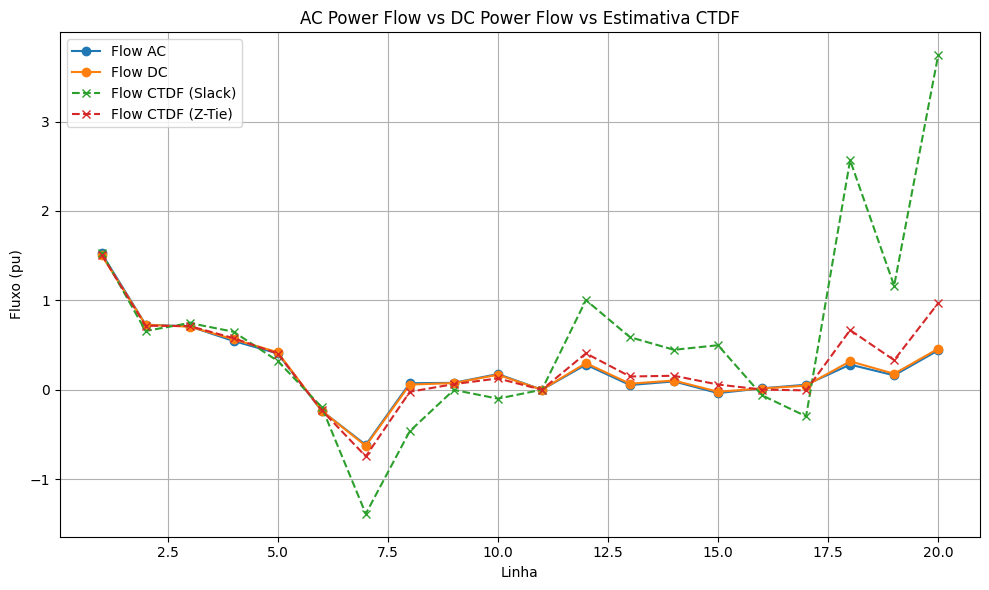

In [24]:
# Índice das barras (1, 2, 3, ...)
linhas = np.arange(1, len(net_DC.lines) + 1)

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(linhas, flow_AC, marker='o', label='Flow AC')
plt.plot(linhas, flow_DC, marker='o', label='Flow DC')
#plt.plot(linhas, flow_CTDF_grnd, marker='x', linestyle='--', label='Flow CTDF (Ground)')
plt.plot(linhas, flow_CTDF_slack, marker='x', linestyle='--', label='Flow CTDF (Slack)')
plt.plot(linhas, flow_CTDF_ztie, marker='x', linestyle='--', label='Flow CTDF (Z-Tie)')
plt.xlabel('Linha')
plt.ylabel('Fluxo (pu)')
plt.title('AC Power Flow vs DC Power Flow vs Estimativa CTDF')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()